## Tarifas de Prepago Megaline

## 1. Contenido


* [1 Contenido](#content)
* [2 Introducción](#intro)
* [3 Inicialización](#inic)
    * [3.1 Cargar Librerias](#library)
    * [3.2 Cargar Datos](#datos)
* [4 Exploración y preparación los datos](#exp)   
    * [4.1 Calls](#calls)
    * [4.2 Internet](#internet)
    * [4.3 Messages](#messages)
    * [4.4 Plans](#plans)  
    * [4.5 Users](#users)      
* [5 Enriquecer los datos](#enriquecer)
    * [5.1 Número de llamadas y minutos utilizados](#calls4month)
    * [5.2 Cantidad de mensajes enviados](#messages4month)
    * [5.3 Volumen de datos utilizados](#gb4month)
    * [5.4 Ingresos mensuales](#income)  
* [6 Análisis de los datos](#analisis)
    * [6.1 Análisis plan ultimate](#ultimate)
    * [6.2 Análisis plan surf](#surf)
    * [6.3 Conclusiones preliminares](#conclusion1)
* [7 Prueba de hipótesis](#hipotesis)    
    * [7.1 Ingreso promedio de las tarifas](#tarifas)
    * [7.2 Ingreso promedio del estado Nueva York-Nueva Jersey vs otras regiones](#estados)
* [8 Conclusión general](#end)

##  2. Introducción

En el presente proyecto se procederá a realizar un análisis para el operador de telecomunicaciones Megaline con el objetivo de averiguar cuál de sus dos tarifas de prepago, Surf y Ultimate, genera mayores ingresos. 

Se realizará un análisis preliminar en base a una selección de 500 clientes, con los datos de quienes son, de donde son, tarifa que utilizan y la cantidad de mensajes, llamadas y datos utilizados durante el año 2018.

Continuaremos con un enriquecimiento de los datos para posteriormente llevar a cabo una prueba de hipótesis de los ingresos promedios de ambas tarifas para finalmente llegar a una conclusion general sobre este tema.

## 3. Inicialización

### 3.1. Cargar librerias

Se procede a cargar las librerías que se utilizaran en el proyecto.

In [1]:
import pandas as pd
import math as mt
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt

### 3.2. Cargar datos

Se procede a cargar los datos.

In [2]:
calls = pd.read_csv("datasets/megaline_calls.csv")
internet = pd.read_csv("datasets/megaline_internet.csv")
messages = pd.read_csv("datasets/megaline_messages.csv")
plans = pd.read_csv("datasets/megaline_plans.csv")
users = pd.read_csv("datasets/megaline_users.csv")

## 4. Exploración y preparación los datos

A continuación, definiremos una serie de funciones que nos ayudaran a realizar la preparación de los datos para posteriormente buscar valores duplicados, ausentes o valores que no tengan un sentido lógico dentro del contexto en que se encuentran. Dentro de la misma sección procederemos a explorar los datos y corregir los problemas que se encuentren en cada dataset.

In [3]:
def prep(data):
    for column in data:
        print(data[column].describe())
        print()

In [4]:
def date_conv(data,column):
    data[column] = pd.to_datetime(data[column], format='%Y-%m-%d')

In [5]:
def percentaje(data,column,value):
    print("{:.2%}".format(len(data[data[column]==value])/len(data)))

### 4.1. Calls

In [6]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [7]:
calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [8]:
prep(calls)

count      137735
unique     137735
top       1000_93
freq            1
Name: id, dtype: object

count    137735.000000
mean       1247.658046
std         139.416268
min        1000.000000
25%        1128.000000
50%        1247.000000
75%        1365.000000
max        1499.000000
Name: user_id, dtype: float64

count         137735
unique           351
top       2018-12-27
freq            1091
Name: call_date, dtype: object

count    137735.000000
mean          6.745927
std           5.839241
min           0.000000
25%           1.290000
50%           5.980000
75%          10.690000
max          37.600000
Name: duration, dtype: float64



In [9]:
len(calls["user_id"].unique())

481

In [10]:
percentaje(calls,"duration",0)

19.48%


Observando los datos en "calls", no se pueden apreciar datos ausentes, aunque si un tipo erróneo de dato en la columna call_date el cual se cambiará a "datetime", por otra parte, se puede apreciar la existencia de una gran cantidad de valores de "duration" de 0, alrededor de un 20% de los datos, estos valores pueden representan llamadas perdidas y se mantendrán durante el análisis debido al gran porcentaje de los datos que componen y que su presencia no debe afectar la hipótesis que se quiere comprobar como objetivo del proyecto ya que estas llamadas no afectan a los ingresos por minutos generados por los planes pero podrian dejar afuera a usuarios cuando se haga el cruce con los otros datasets.

También podemos apreciar que, aunque se nos otorgó un dataset de 500 usuarios distintos, en el caso de las llamas solamente tenemos el registro de 481 de estos usuarios. Por último, como se menciona que Megaline redondea los segundos a minutos de las llamadas individuales, redondearemos los valores de "duration" hacia "arriba" según esta indicación.

In [11]:
date_conv(calls, "call_date")

In [12]:
calls["duration"] = calls["duration"].apply(mt.ceil)

In [13]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 4.2+ MB


In [14]:
calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,9
1,1000_145,1000,2018-12-27,14
2,1000_247,1000,2018-12-27,15
3,1000_309,1000,2018-12-28,6
4,1000_380,1000,2018-12-30,5


### 4.2. Internet

In [15]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [16]:
internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [17]:
prep(internet)

count      104825
unique     104825
top       1000_13
freq            1
Name: id, dtype: object

count    104825.000000
mean       1242.496361
std         142.053913
min        1000.000000
25%        1122.000000
50%        1236.000000
75%        1367.000000
max        1499.000000
Name: user_id, dtype: float64

count         104825
unique           351
top       2018-12-24
freq             851
Name: session_date, dtype: object

count    104825.000000
mean        366.713701
std         277.170542
min           0.000000
25%         136.080000
50%         343.980000
75%         554.610000
max        1693.470000
Name: mb_used, dtype: float64



In [18]:
len(internet["user_id"].unique())

489

In [19]:
percentaje(internet,"mb_used",0)

13.11%


No se aprecia ningún valor ausente ni valor ilógico en el dataframe, solamente se abordará el cambio de tipo de dato para la columna "session_date". Como en el caso anterior, podemos notar que en este dataset solo existe el registro de 489 usuarios distintos.

In [20]:
date_conv(internet, "session_date")

In [21]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


### 4.3. Messages

In [22]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [23]:
messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [24]:
prep(messages)

count        76051
unique       76051
top       1000_125
freq             1
Name: id, dtype: object

count    76051.000000
mean      1245.972768
std        139.843635
min       1000.000000
25%       1123.000000
50%       1251.000000
75%       1362.000000
max       1497.000000
Name: user_id, dtype: float64

count          76051
unique           351
top       2018-12-28
freq             702
Name: message_date, dtype: object



In [25]:
len(messages["user_id"].unique())

402

No se aprecia ningún valor ausente ni valor ilógico en el dataframe, solamente se abordará el cambio de tipo de dato para la columna "message_date". Como en los casos anteriores, en este dataset poseemos una cantidad inferior de usuarios distintos a los 500 otorgados para el estudio, en este caso de 402.

In [26]:
date_conv(messages, "message_date")

In [27]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


### 4.4. Plans

In [28]:
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [29]:
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


No se aprecia ningún valor ausente ni valor ilógico en el dataframe por lo cual no se realizará ningún procedimiento.

### 4.5. Users

In [30]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [31]:
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [32]:
users["user_id"].duplicated().sum()

0

In [33]:
prep(users)

count     500.000000
mean     1249.500000
std       144.481833
min      1000.000000
25%      1124.750000
50%      1249.500000
75%      1374.250000
max      1499.000000
Name: user_id, dtype: float64

count         500
unique        458
top       Leonila
freq            3
Name: first_name, dtype: object

count       500
unique      399
top       David
freq          3
Name: last_name, dtype: object

count    500.000000
mean      45.486000
std       16.972269
min       18.000000
25%       30.000000
50%       46.000000
75%       61.000000
max       75.000000
Name: age, dtype: float64

count                                           500
unique                                           73
top       New York-Newark-Jersey City, NY-NJ-PA MSA
freq                                             80
Name: city, dtype: object

count            500
unique           266
top       2018-03-08
freq               5
Name: reg_date, dtype: object

count      500
unique       2
top       surf
freq       339
Nam

Se pueden observar valores ausentes en la columna "churn_date", esta columna corresponde a la fecha de salida de los clientes del plan por lo que es lógico que haya una gran cantidad de valores ausentes ya que estos corresponden a las personas que pasado 2018 seguían utilizando estos planes, debido a lo anterior es que se mantendrán los valores ausentes ya que al rellenarlos con valores de tipo object no podríamos transformar los existentes a datetime.

Por parte de valores ilógicos en el dataframe no se puede apreciar ninguno por lo que solamente se procederá a realizar el cambio de tipo de dato para las columnas "reg_date" y "churn_date".

In [34]:
date_conv(users, "reg_date")

In [35]:
date_conv(users, "churn_date")

In [36]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


## 5. Enriquecer los datos

Procederemos a realizar un enriquecimiento de datos en un nuevo dataset "users_full", este dataset estará compuesto por las filas únicas de la columna user_id para cada usuario, para poder realizar posteriormente el análisis correspondiente.

### 5.1. Número de llamadas y minutos utilizados

Primero agregaremos a partir del dataset "calls" una columna que muestre el número de llamadas realizadas por cada usuario y otra con los minutos utilizados por mes.

In [37]:
calls_stat = calls.pivot_table(index="user_id", values="duration", aggfunc=["count", "sum"]).reset_index()
calls_stat.columns = ("user_id","calls_per_moth", "duration_call_per_month")
calls_stat["calls_per_moth"] = (calls_stat["calls_per_moth"]/12).astype({"calls_per_moth":'int'})
calls_stat["duration_call_per_month"] = (calls_stat["duration_call_per_month"]/12).astype({"duration_call_per_month":'int'})
users_full = users.merge(calls_stat, on="user_id")

In [38]:
users_full.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,calls_per_moth,duration_call_per_month
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,1,10
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,21,144
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,9,69
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,12,92
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT,30,231


### 5.2. Cantidad de mensajes enviados

Continuaremos agregando la cantidad de SMS enviados por mes a través de la información obtenida del dataset "messages".

In [39]:
messages_stat = messages.pivot_table(index="user_id", values="id", aggfunc="count")
messages_stat = (messages_stat["id"]/12).astype({"id":'int'}).reset_index()
messages_stat.columns = ("user_id","messages_per_moth")
users_full = users_full.merge(messages_stat, on="user_id")

In [40]:
users_full.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,calls_per_moth,duration_call_per_month,messages_per_moth
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,1,10,0
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,21,144,17
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,9,69,7
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,12,92,4
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT,30,231,14


### 5.3. Volumen de datos utilizados

A continuación, agregaremos una columna correspondiente al volumen de datos utilizados por mes a partir del dataset "internet". En este caso, como indican los procedimientos de Megaline, se procederá a redondear los valores de consumo mensual de datos de internet hacia "arriba" de megabytes a gigabytes.

In [41]:
internet_stat = internet.pivot_table(index="user_id", values="mb_used", aggfunc="sum")
internet_stat = (internet_stat["mb_used"]/12).reset_index()
internet_stat.columns = ("user_id","gb_per_moth")
internet_stat["gb_per_moth"] = internet_stat["gb_per_moth"]/1000
internet_stat["gb_per_moth"] = internet_stat["gb_per_moth"].apply(mt.ceil)
users_full = users_full.merge(internet_stat, on="user_id")

In [42]:
users_full.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,calls_per_moth,duration_call_per_month,messages_per_moth,gb_per_moth
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,1,10,0,1
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,21,144,17,7
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,9,69,7,4
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,12,92,4,3
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT,30,231,14,14


### 5.4. Ingresos mensuales

Finalmente, añadiremos una columna correspondiente a los ingresos mensuales correspondientes a cada usuario.

In [43]:
def month_income(row):
    if row['plan'] == "ultimate":
        call_plan = row['duration_call_per_month']-3000
        msn_plan = row['messages_per_moth']-1000
        gb_plan = row['gb_per_moth']-30
        if call_plan > 0:
            call_total = call_plan*0.01            
        else:
            call_total = 0
        if msn_plan > 0:
            msn_total = msn_plan*0.01
        else:
            msn_total = 0
        if gb_plan > 0:
            gb_total = gb_plan*7
        else:
            gb_total = 0
        return 70 + call_total + msn_total + gb_total
    elif row['plan'] == "surf":
        call_plan = row['duration_call_per_month']-500
        msn_plan = row['messages_per_moth']-50
        gb_plan = row['gb_per_moth']-15
        if call_plan > 0:
            call_total = call_plan*0.03            
        else:
            call_total = 0
        if msn_plan > 0:
            msn_total = msn_plan*0.03
        else:
            msn_total = 0
        if gb_plan > 0:
            gb_total = gb_plan*10
        else:
            gb_total = 0
        return 20 + call_total + msn_total + gb_total
users_full["month_income"] = users_full.apply(month_income, axis=1)

In [44]:
users_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 392
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   user_id                  393 non-null    int64         
 1   first_name               393 non-null    object        
 2   last_name                393 non-null    object        
 3   age                      393 non-null    int64         
 4   city                     393 non-null    object        
 5   reg_date                 393 non-null    datetime64[ns]
 6   plan                     393 non-null    object        
 7   churn_date               25 non-null     datetime64[ns]
 8   calls_per_moth           393 non-null    int32         
 9   duration_call_per_month  393 non-null    int32         
 10  messages_per_moth        393 non-null    int32         
 11  gb_per_moth              393 non-null    int64         
 12  month_income             393 non-nul

In [45]:
users_full.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,calls_per_moth,duration_call_per_month,messages_per_moth,gb_per_moth,month_income
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,1,10,0,1,70.0
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,21,144,17,7,20.0
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,9,69,7,4,20.0
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,12,92,4,3,20.0
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT,30,231,14,14,20.0


Finalmente hemos obtenido un único dataframe que, con las columnas adicionales de número de llamadas por mes, duración de las llamadas por mes, numero de mensajes enviados por mes y datos utilizados por mes, que se utilizara para el análisis objetivo del proyecto. A de remarcarse que la cantidad de filas de este dataframe a disminuido de 500 usuarios distintos a 393, esto se explica debido a que, como se mencionó en la sección anterior, los dataframes de "calls", "messages" y "internet" no poseían registros de los 500 usuarios distintos dentro de sí mismos por lo que al realizar el cruce de información entre estos la cantidad de usuarios disminuyo a los que eran comunes para estos tres dataframes.

## 6. Análisis de los datos

En esta sección crearemos dataframes independientes para cada uno de los planes a analizar, con estos dataframes describiremos el comportamiento de los clientes para cada uno de los parámetros de los que consta el plan, observaremos los promedios, varianzas, desviación estándar y las distribuciones.

Partiremos definiendo una función que nos ayude con el análisis y creando los dataframes antes mencionados.

In [46]:
def param_stad(data, column):
    prom = round(data[column].mean(), 2)
    var = round(np.var(data[column]), 2)
    est = round(np.std(data[column]), 2)
    print(f'promedio: {prom}, varianza: {var}, desv estandar: {est}')

In [47]:
users_ultimate = users_full[users_full["plan"]=="ultimate"]
users_surf = users_full[users_full["plan"]=="surf"]

### 6.1. Análisis plan ultimate

In [48]:
param_stad(users_ultimate, "month_income")

promedio: 70.16, varianza: 3.34, desv estandar: 1.83


Text(0, 0.5, 'users')

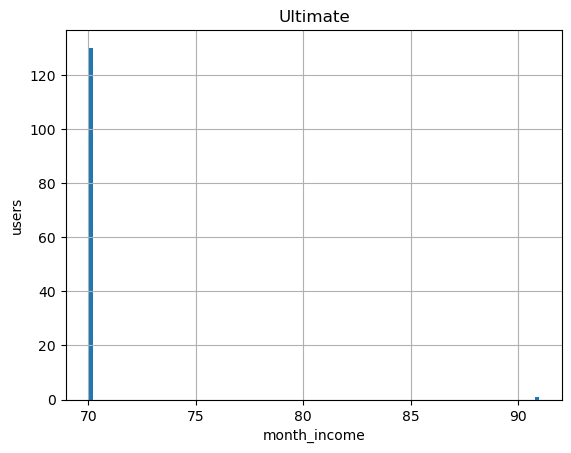

In [49]:
users_ultimate.hist('month_income',bins=100)
plt.title('Ultimate')
plt.xlabel('month_income')
plt.ylabel("users")

In [50]:
users_ultimate[users_ultimate["month_income"]>70]

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,calls_per_moth,duration_call_per_month,messages_per_moth,gb_per_moth,month_income
21,1028,Jefferey,Rasmussen,57,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-02-21,ultimate,NaT,6,43,63,33,91.0


Como podemos apreciar para el ingreso mensual entregado por el plan "ultimate", prácticamente todos los usuarios de este plan se mantienen dentro del pago mensual sin pagar excedentes a excepción de un único usuario que pagó excedentes por pasarse en el uso de datos de internet. Debido a lo anterior el promedio es se mantiene muy cercano al precio propio del plan de 70 dólares y la variación estándar es muy baja.

Text(0, 0.5, 'users')

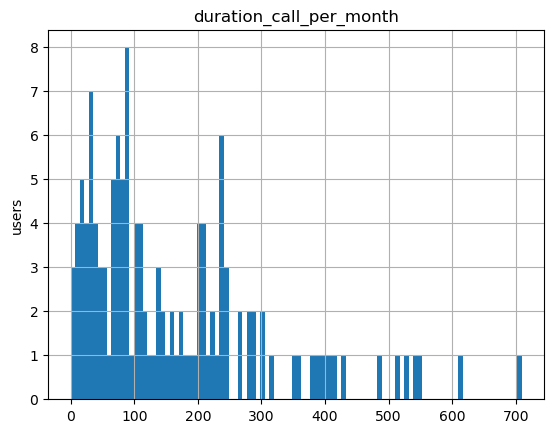

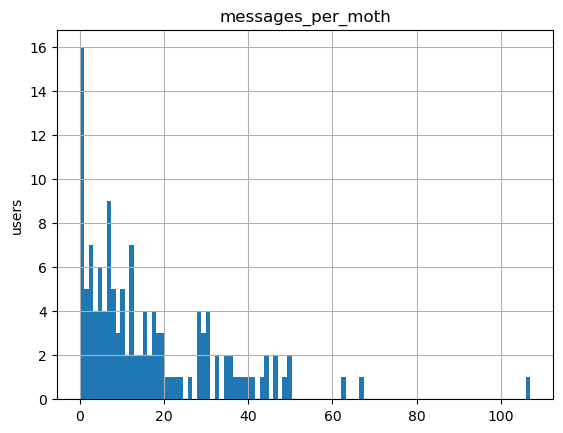

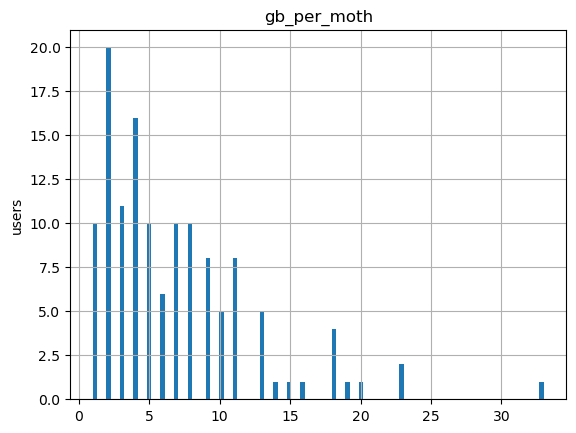

In [51]:
users_ultimate.hist('duration_call_per_month',bins=100)
plt.ylabel("users")
users_ultimate.hist('messages_per_moth',bins=100)
plt.ylabel("users")
users_ultimate.hist('gb_per_moth',bins=100)
plt.ylabel("users")

Podemos observar que en todas las columnas de parámetros que afectan los ingresos por mes presentan un sesgo positivo, es decir una asimetría positiva. 

Para el caso de la duración de las llamadas por mes podemos observar el mayor peak de duración alrededor de los 90 minutos de llamadas por mes, también podemos observar que a partir de los 300 minutos por mes la cantidad de personas que ocupan esta cantidad de minutos se mantiene más o menos contante hasta la duración máxima de 700 minutos por mes.

Para el caso de la cantidad de mensajes enviados podemos observar que el peak se encuentra en los 0 mensajes y a partir de aquí disminuyen la cantidad de usuarios conforme aumenta la cantidad de mensajes enviados. Con lo anterior podemos concluir que los mensajes es una de las funciones que menos utilizan los usuarios del plan "ultimate".

Para el caso de los datos utilizados el peak se encuentra en los 2 gigabytes utilizados al mes, disminuyendo hasta los 23 gigabytes, existiendo un valor atípico de 33 gigabytes el cual es el usuario que paga excedentes.

### 6.2. Análisis plan surf

In [52]:
param_stad(users_surf, "month_income")

promedio: 22.12, varianza: 124.19, desv estandar: 11.14


In [53]:
len(users_surf)

262

Text(0, 0.5, 'users')

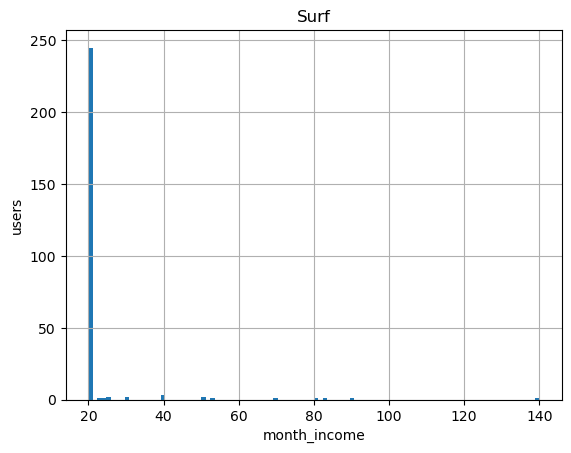

In [54]:
users_surf.hist('month_income',bins=100)
plt.title('Surf')
plt.xlabel('month_income')
plt.ylabel("users")

<AxesSubplot:>

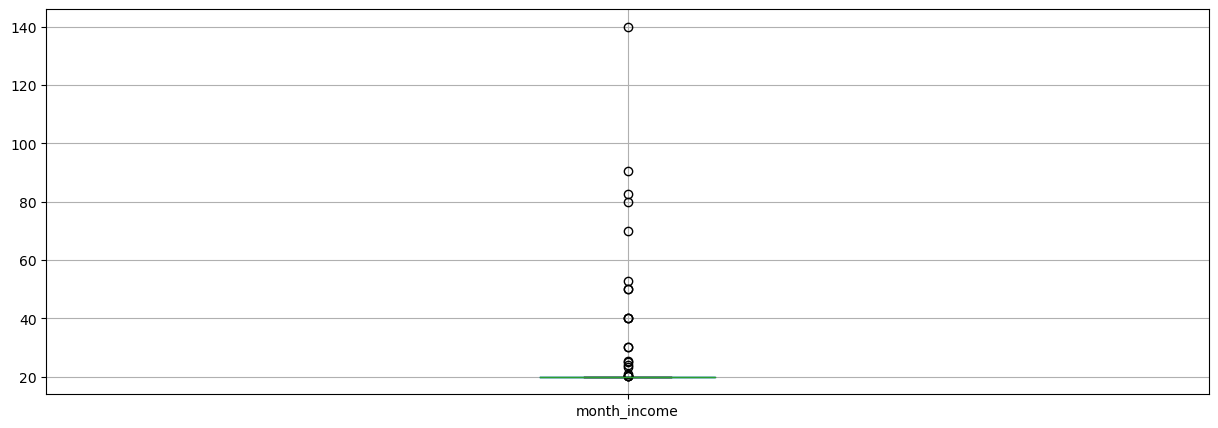

In [55]:
users_surf.boxplot(column="month_income", figsize=(15,5))

In [56]:
len(users_surf[users_surf["month_income"]>20])

22

En el caso del plan "surf" alrededor de un 10% de los usuarios pagan excedentes por el uso de su plan mensual, observando el promedio de ingresos mensuales por este plan es un valor de un 10% mayor al costo de 20 dólares del plan, debido a todo lo anterior expuesto la desviación estándar para este plan es mucho mayor que para el plan "ultimate", siendo de 11 dólares aproximadamente debido a los usuarios que pagan excedentes. 

Text(0, 0.5, 'users')

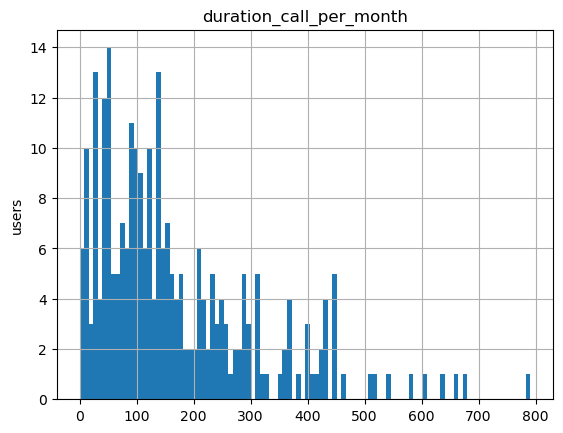

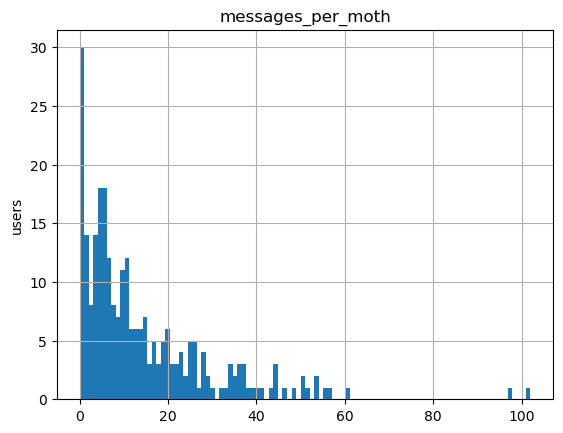

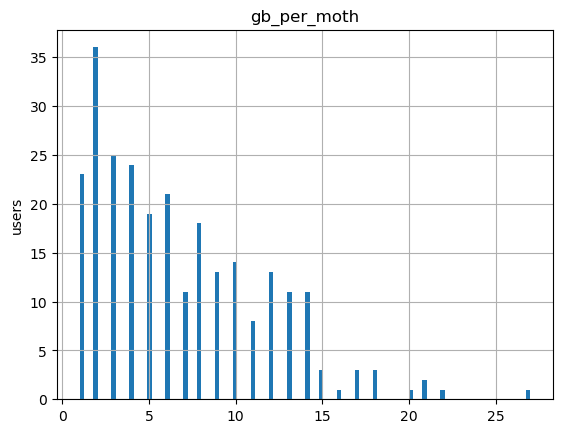

In [57]:
users_surf.hist('duration_call_per_month',bins=100)
plt.ylabel("users")
users_surf.hist('messages_per_moth',bins=100)
plt.ylabel("users")
users_surf.hist('gb_per_moth',bins=100)
plt.ylabel("users")

Al igual que en el caso del plan "ultimate" podemos observar que los parámetros que afectan los ingresos poseen un sesgo positivo en su distribución.

En el caso de la duración de las llamadas por mes, para este plan podemos observar una distribución similar a la del plan anterior, aunque se puede observar que el peak de usuarios de este grafico es mayor que en el plan anterior, también a partir de los 460 minutos de duración de llamadas por mes podemos apreciar los usuarios que sobrepasan el límite de minutos que abarca el plan y por ende comienzan a pagar excedentes.

Para el caso de la cantidad de mensajes enviados por mes, estos también muestran un peak en los 0 mensajes y comienzan a disminuir progresivamente según comienza a aumentar el envío de los mismos, a partir de los 50 mensajes que es el límite otorgado por el plan podemos encontrar usuarios que sobrepasan este límite hasta llegar a alrededor de los 60 mensajes y más a la derecha vemos casos atípicos de usuarios que mandan alrededor de 100 mensajes por mes.

Para finalizar con los datos utilizados al mes el peak vuelve a encontrarse en los 2 gigabytes y a partir de los 15 gigabytes encontramos a los usuarios que pagan excedentes.

### 6.3. Conclusiones preliminares

Comparando la distribución de ambos planes podemos concluir que son similares presentando patrones de asimetría iguales y tendencias muy parecidas, en el caso del plan "surf" podemos observar que alrededor de un 10% de los usuarios exceden los límites que presenta este plan mientras que de los usuarios del plan "ultimate" solo uno de los usuarios registrados en el dataset sobrepasa los límites de ese plan.

## 7. Prueba de hipótesis

Ahora procederemos a realizar las pruebas de hipótesis con respecto a igualdad de las medias en dos poblaciones, primero comprobaremos la hipótesis de si el ingreso promedio de las tarifas difiere y posteriormente comprobaremos si el ingreso promedio de los usuarios de estados Nueva York-Nueva Jersey no difiere del resto de las otras regiones.

### 7.1. Ingreso promedio de las tarifas

Comenzaremos comprobando la hipótesis de que el ingreso promedio de los usuarios de las tarifas Ultimate y Surf difiere, para este caso definiremos la hipótesis nula como que los ingresos promedios entre las tarifas no varían ya que normalmente se define la hipótesis nula como que no hay variaciones entre los valores estudiados. Para el caso del valor alfa utilizaremos el valor del 5% por ser una medida común de significación estadística.

In [58]:
alpha = 0.05

In [59]:
results = st.ttest_ind(users_ultimate["month_income"], users_surf["month_income"])

In [60]:
print('p-value:', results.pvalue)

p-value: 1.1540377688740305e-168


In [61]:
if (results.pvalue < alpha):
    print("Rechazamos la hipótesis nula, el ingreso promedio de las tarifas difiere")
else:
    print("No rechazamos la hipótesis nula, el ingreso promedio de las tarifas es igual")

Rechazamos la hipótesis nula, el ingreso promedio de las tarifas difiere


Realizada la prueba de hipótesis podemos comprobar que se rechazó la hipótesis nula, es decir el ingreso promedio entre ambas tarifas si difiere. el p-value es de 1.154e-168 aprox, es decir que existe una probabilidad infima de obtener un valor de la igualdad de ingresos en ambas tarifas como hemos establecido en la hipótesis nula, al ser este valor tan bajo es poco probable de la diferencia entre tarifas sea debido al azar y por esto es rechazada la hipótesis nula de que ambas tarifas no difieren.

### 7.2. Ingreso promedio del estado Nueva York-Nueva Jersey vs otras regiones

Continuaremos comprobando la hipótesis de que el ingreso promedio de los usuarios en el área de estados Nueva York-Nueva Jersey es diferente al de los usuarios de otras regiones, para este caso definiremos la hipótesis nula como que el ingreso entre los usuarios de Nueva York-Nueva Jersey no difiere de los del resto de las regiones bajo el mismo argumento que en el caso anterior, para el valor alfa también se utilizara el 5% por ser una medida común de significación estadística.

In [62]:
alpha = 0.05

In [63]:
results = st.ttest_ind(users_full[users_full["city"]=="New York-Newark-Jersey City, NY-NJ-PA MSA"]["month_income"],
                       users_full[users_full["city"]!="New York-Newark-Jersey City, NY-NJ-PA MSA"]["month_income"])

In [64]:
print('p-value:', results.pvalue)

p-value: 0.28810810483002924


In [65]:
if (results.pvalue < alpha):
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")

No rechazamos la hipótesis nula


Realizada la prueba de hipótesis podemos comprobar que no se rechazó la hipótesis nula, es decir nuestro análisis sugiere que el promedio de ingreso de los usuarios de los estados en el área de estados Nueva York-Nueva Jersey es similar al del resto de los estados por ende nuestra hipótesis original de que estos promedios diferían no puede ser validada. En este caso el p-value es de un 29% aprox por lo que diferencias en los promedios de ingresos pueden verse influenciados por el azar de donde se obtuvieron los datos.

## 8. Conclusión general

Comenzando con el trabajo realizado con el procesamiento de los datos, los dataframe en general se encontraban en muy buenas condiciones siendo el mayor cambio realizado en la mayoría de ellos el cambio de tipo de columna object a datetime en las que correspondían a valores de fechas. Independiente de lo anterior, existen dos casos puntuales que se tuvieron que analizar los cuales son:

 La presencia de valores de 0 en la duración de las llamadas del dataframe "calls", consistiendo en alrededor de un 20% de los valores. Se determinó mantener estos valores de 0, que podían corresponder a llamadas perdidas, ya que su presencia no iba a afectar el análisis de ingresos correspondiente a cada plan y por otra parte el eliminar estas llamadas podía conducir a la eliminación de usuarios del dataframe final al realizar el cruce de datos con el resto de los dataframe con el identificador único de cada usuario, ya que podrían ser usuarios que no tuvieran minutos de uso de las llamadas pero si uso de datos o mensajes y que quedarían fuera al eliminar estas filas.
 
 El otro aspecto a analizar fue la ausencia de valores en la columna "churn_date" en el dataframe "users", esta ausencia de valores corresponde a la gente que al terminar el año 2018 aun seguía utilizando su plan por lo que no poseía una fecha de salida del mismo, se decidió no rellenar estos valores ya que podría entrar en conflicto a la hora de cambiar el tipo de dato de object a datetime.
 
 Posteriormente se continuo con el enriquecimiento de datos a través de la creación de un nuevo dataframe "users_full" a partir del dataframe users con la adición de columnas que se cruzan con el resto de los dataframe. Se creó una columna de cantidad de llamadas y duración de las llamadas por mes a través del cruce con el dataframe "calls", se creó una columna de cantidad de mensajes por mes con el dataframe "messages" y otra columna con datos utilizados por mes con el dataframe "internet". Finalmente se creó a partir de las columnas recientemente añadidas una última columna con los ingresos mensuales por parte de Megaline a partir de una función que detecta el tipo de plan del usuario y aplica sus condiciones específicas.

Procedimos con un análisis individual de cada plan, observando la distribución, promedio, desviación estándar e histogramas de ambos. Se concluye que ambos planes presentan en cada uno de los parámetros que generan ingresos, llamadas, mensajes y datos, una distribución semejante con una asimetría positiva con sus peaks en valores cercanos. El plan "ultimate" prácticamente no presenta usuarios que sobrepasen los límites del propio plan siendo su promedio un 0,2% mayor al valor de tarifa del plan, por el contrario, el plan "surf" presenta un 10% de usuarios que sobrepasan los límites de tarifa del plan y por ende pagan excedentes lo que aumenta la recaudación de este plan en un 10% por sobre su valor establecido.

Finalmente se realizaron dos pruebas de hipótesis, la primera con respecto a que el promedio de tarifas de ambos planes difiere. Para este primer caso se utilizó como hipótesis nula que ambas tarifas no difieren ya que normalmente se utiliza como la misma el hecho de que los valores se mantengan iguales, como valor alpha se escogió un 5% por ser un valor habitual del mismo. Como resultado la hipótesis se procedió a rechazar la hipótesis nula ya que el p-value obtenido era mucho menor que el valor alpha obtenido por lo que las diferencias entre promedio de ingresos de las tarifas no se deben al azar de la recolección de los datos sino a que ambas difieren en sí mismas.

Como segunda prueba de hipótesis se verifico si el ingreso promedio de los usuarios en el área de estados Nueva York-Nueva Jersey es diferente al de los usuarios de otras regiones, en este caso se utilizó como hipótesis nula que los ingresos promedios no difieren y un valor alpha de 5% por lo expuesto en la prueba anterior. En este caso se obtuvo un p-value de un 29% aproximadamente por lo que no se puede rechazar la hipótesis nula de que los ingresos promedio de los usuarios en el área de estados Nueva York-Nueva Jersey es igual al del resto de las regiones y por ende rechazamos nuestra hipótesis original que planteaba que diferían.

Para concluir, en base a lo analizado y las pruebas de hipótesis realizadas, podemos decantarnos a que el plan "ultimate" genera más ingresos a Megaline que el plan "surf", el primero posee un promedio de ingresos mucho mayor que el segundo y aunque una mayor cantidad de usuarios tiendan a sobrepasar los límites de las tarifas del plan "surf" pagando excedentes esto no alcanza para acercarse al valor base pagado en el plan "ultimate". Por otra parte, la prueba de hipótesis realizada nos arroja un resultado lo suficientemente definitorio como para decir que las diferencias de ingresos promedios en los planes son debido a los mismos planes y no debido a que haya una influencia por el azar existente al obtener los datos utilizados para el estudio. En base a lo anterior e que se recomienda a Megaline que invierta sus esfuerzos en promocionar el plan "ultimate" en pos de obtener mayores beneficios.